In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
data_dir = './'
data_file = 'Jain.txt'

In [5]:
df = pd.read_csv(os.path.join(data_dir, data_file), sep=' ')
df.head(3)

,x,y,tag
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2


<Axes: xlabel='x', ylabel='y'>

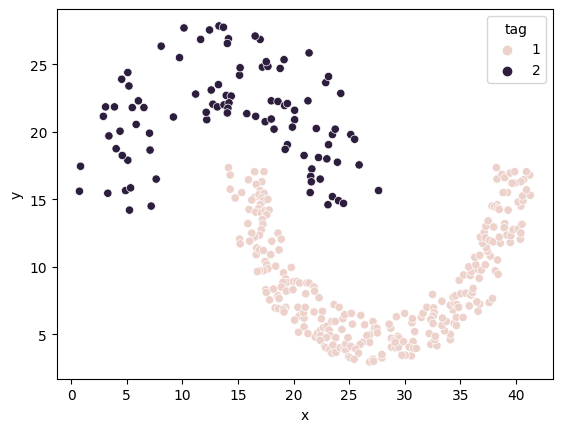

In [6]:
sns.scatterplot(data=df, x="x", y="y", hue="tag")

In [7]:
X_0 = df['x'].tolist()
X_1 = df['y'].tolist()
X = np.column_stack((X_0, X_1))
y = df['tag'].tolist()

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, _ = train_test_split(X, y, test_size=0.7, random_state=42, shuffle=True)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from matplotlib import pyplot as plt
sns.set()

coef = [0.001, 1.0, 1000.0]

x_min, x_max = np.min(X[:, 0]) - 1.0, np.max(X[:, 0]) + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

#h = 0.01
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

df_df = pd.DataFrame()

xd = np.array([x_min, x_max])

#XX = np.c_[xx.ravel(), yy.ravel()]
#df_df['xx'] = XX[:, 0] 
#df_df['yy'] = XX[:, 1]

#df_df['tag_mean'] = np.ones((XX.shape[0],))

# sns.set_style(style='white')

mean_prob = np.ones((X.shape[0], 2))

lines = []

for idx, c in enumerate(coef):
    clf = LogisticRegression(random_state=42, C=c, solver='liblinear', max_iter=1000)
    clf.fit(train_X, train_y)
    tag_back = 'back' + str(c) 
    #predicted_proba = clf.predict_proba(XX)
    predicted_proba_data = clf.predict_proba(X)
    mean_prob += predicted_proba_data
    #df_df[tag_back] = np.max(predicted_proba, axis=1)
    #df_df['tag_mean'] = df_df[[tag_back,'tag_mean']].min(axis=1)
    # print(clf.coef_, clf.intercept_)
    # Retrieve the model parameters.
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2
    yd = m*xd + c
    lines.append(yd)
    
    


In [11]:
mean_prob

array([[1.21811618, 3.78188382],
       [1.4154029 , 3.5845971 ],
       [1.59322325, 3.40677675],
       [2.14319145, 2.85680855],
       [1.6398071 , 3.3601929 ],
       [1.61249217, 3.38750783],
       [1.30193972, 3.69806028],
       [1.27079343, 3.72920657],
       [1.23979127, 3.76020873],
       [1.20374515, 3.79625485],
       [1.17106047, 3.82893953],
       [1.16414717, 3.83585283],
       [1.17614206, 3.82385794],
       [1.21533254, 3.78466746],
       [2.20761735, 2.79238265],
       [1.59546651, 3.40453349],
       [1.32195169, 3.67804831],
       [1.27603121, 3.72396879],
       [1.23357403, 3.76642597],
       [1.20338864, 3.79661136],
       [1.22269905, 3.77730095],
       [1.20462955, 3.79537045],
       [1.17377745, 3.82622255],
       [1.1576491 , 3.8423509 ],
       [1.1588838 , 3.8411162 ],
       [1.17637568, 3.82362432],
       [1.18893485, 3.81106515],
       [1.21679854, 3.78320146],
       [1.29693786, 3.70306214],
       [1.3034896 , 3.6965104 ],
       [1.

In [11]:
from scipy.stats import entropy

def calculate_entropy(mean_dist):
    return entropy(mean_dist)

score = np.apply_along_axis(calculate_entropy, axis=1, arr=mean_prob)

In [12]:
score.shape

(373,)

In [13]:
df

,x,y,tag
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


In [14]:
df['ood_score'] = score

In [15]:
df_line = pd.DataFrame()
df_line['x'] = xd
df_line['y0'] = lines[0]
df_line['y1'] = lines[1]
df_line['y2'] = lines[2]



/tmp/ipykernel_656317/3024105224.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  p = plt.cm.get_cmap('jet') # sns.color_palette("Spectral", as_cmap=True)


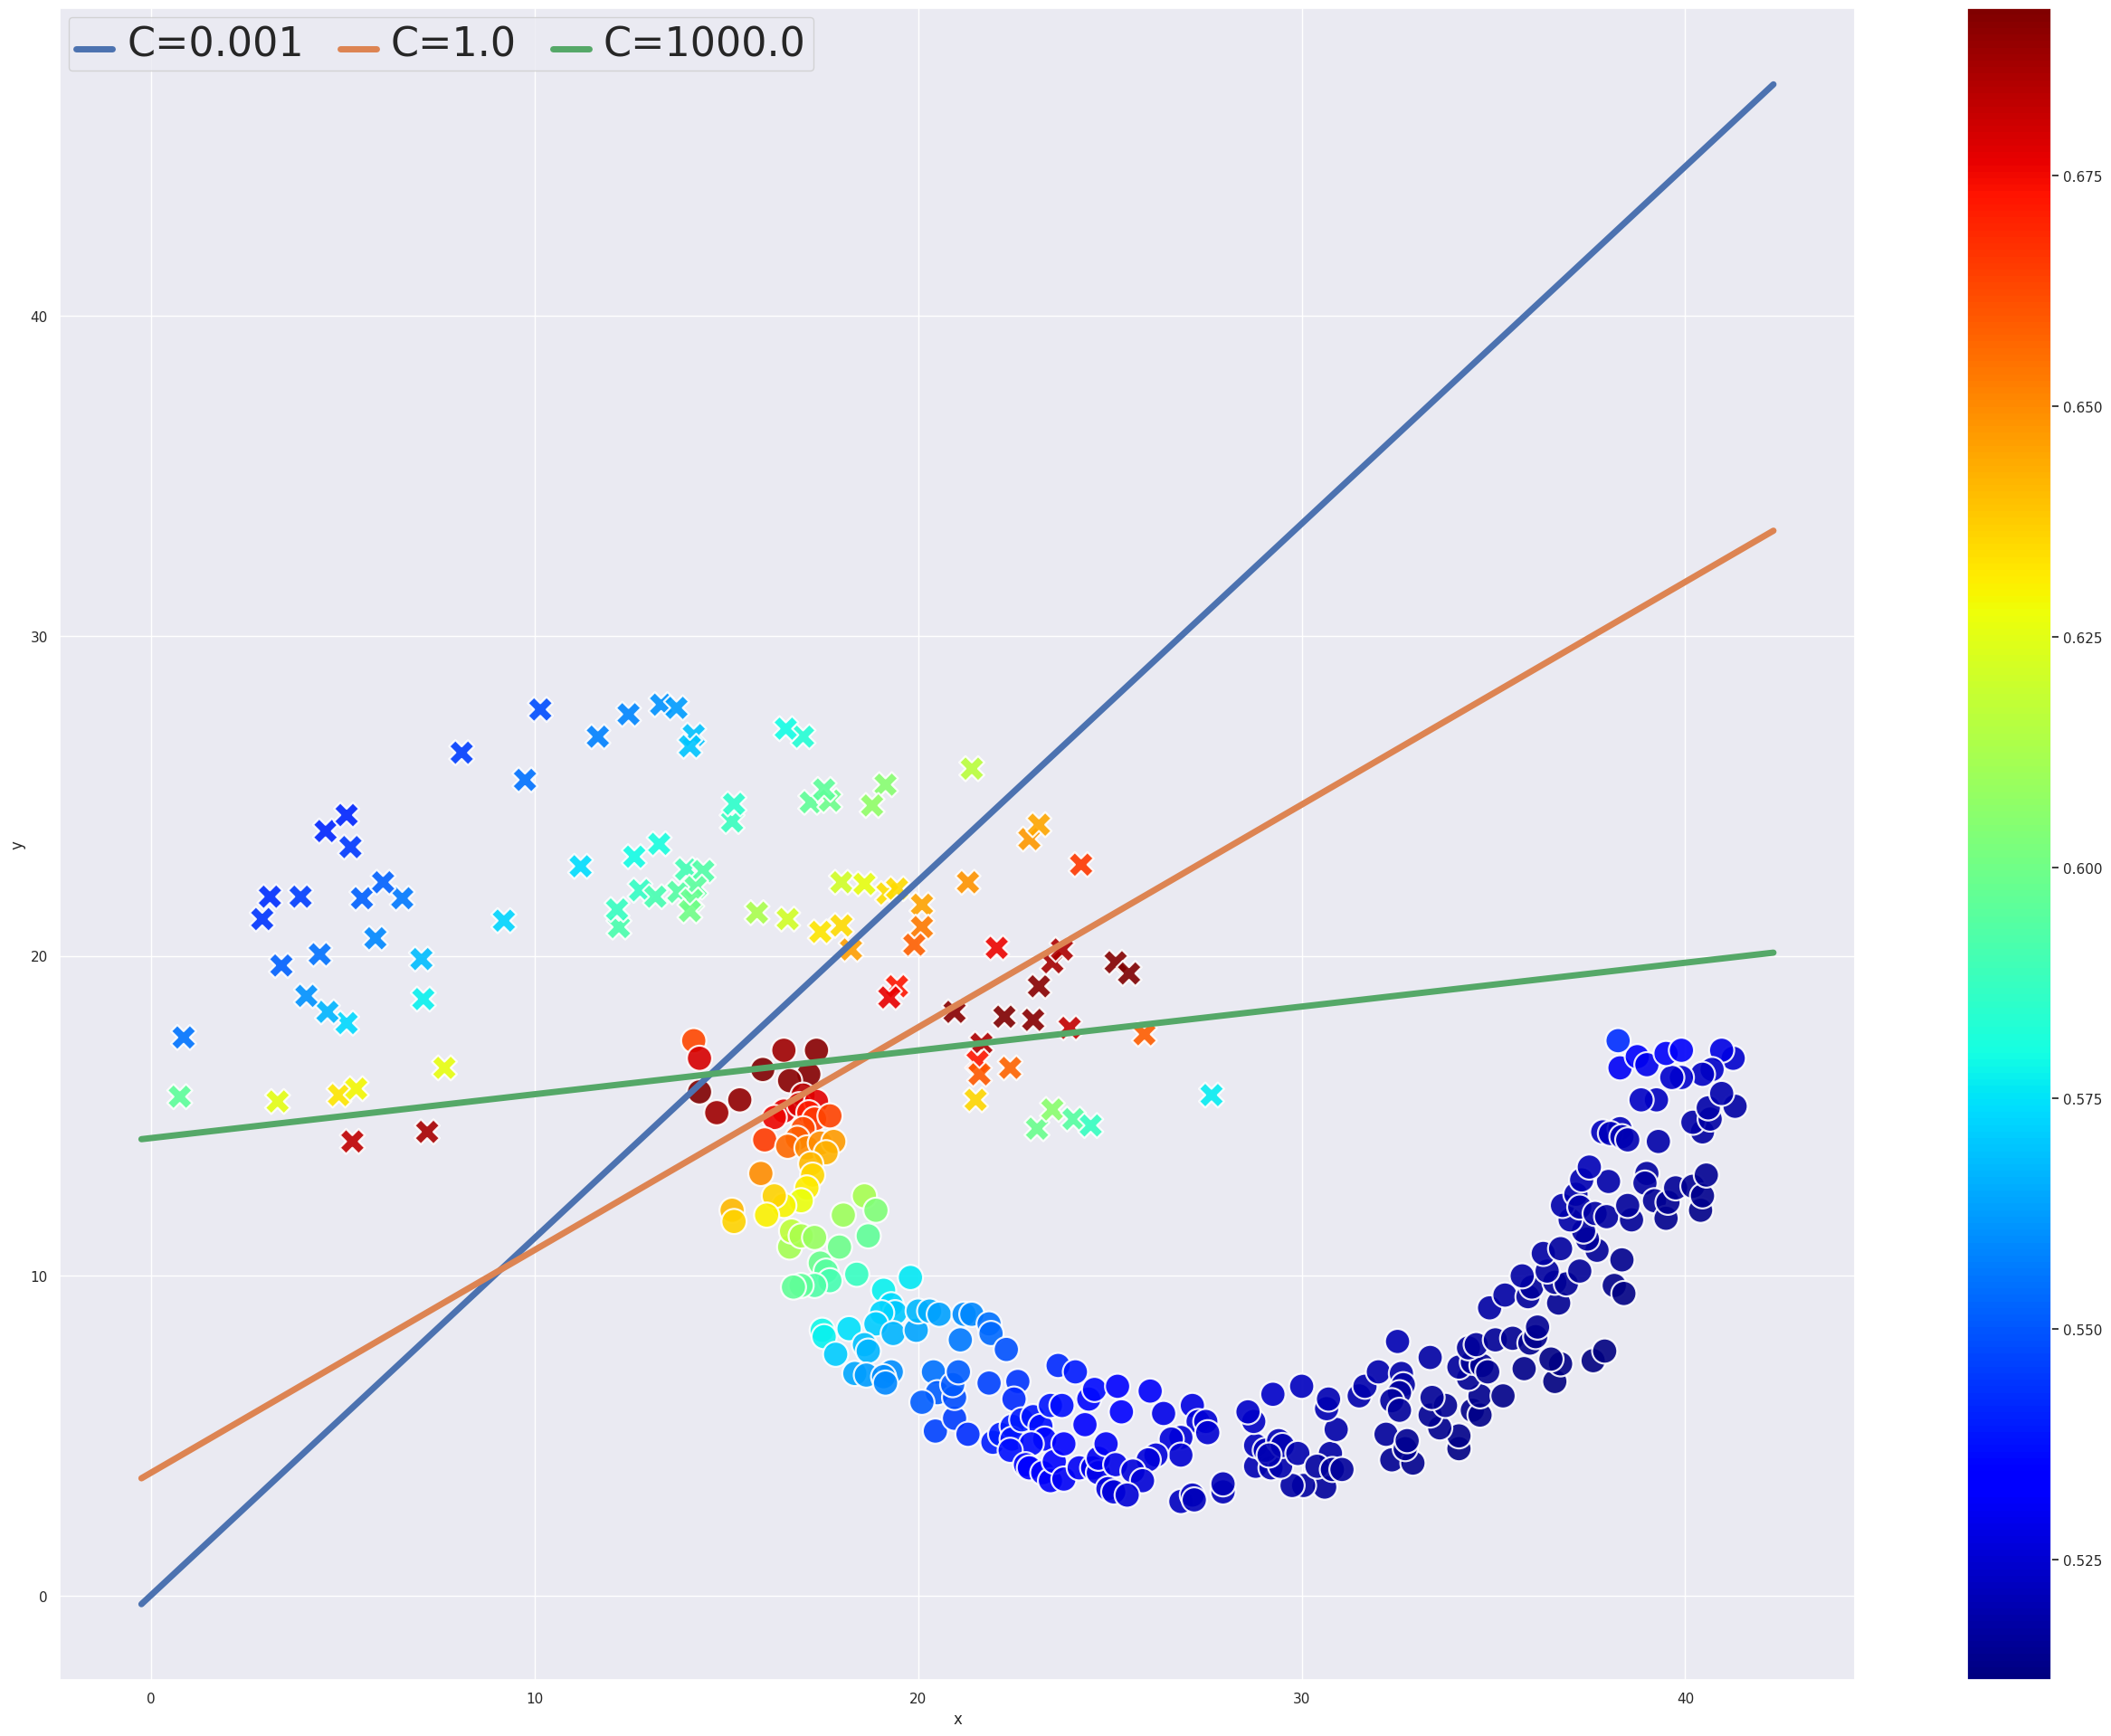

In [24]:
a4_dims = (32, 24)
fig, ax = plt.subplots(figsize=a4_dims)

p = plt.cm.get_cmap('jet') # sns.color_palette("Spectral", as_cmap=True)
norm = plt.Normalize(df['ood_score'].min(), df['ood_score'].max())
sm = plt.cm.ScalarMappable(cmap=p, norm=norm)

sns.scatterplot(ax=ax, data=df, x="x", y="y", hue='ood_score', style="tag", palette=p, alpha = 0.9, s=400)
sns.lineplot(ax=ax, data=df_line, x="x", y="y0", label="C=0.001", linewidth=5)
sns.lineplot(ax=ax, data=df_line, x="x", y="y1", label="C=1.0", linewidth=5)
sns.lineplot(ax=ax, data=df_line, x="x", y="y2", label="C=1000.0", linewidth=5)

ax.legend()

# plt.legend([],[], frameon=False)
i = 9
handles, labels = ax.get_legend_handles_labels()
plt.legend(ncol=3, fontsize='large', loc='upper left', markerfirst=True, shadow=False, handles=handles[i:],
           labels=labels[i:])
plt.setp(ax.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='40') # for legend text

ax.figure.colorbar(sm, ax=ax)